In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('/content/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
df.shape

(6497, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [61]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [62]:
df = df.dropna()

In [63]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [65]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [66]:
df['type'].unique()

array([1, 0])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [67]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [68]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=1)
train,val = train_test_split(train,test_size=0.2,random_state=1)

In [69]:
def get_labels(df):
   type_wine = df.pop('type')
   type_wine = np.array(type_wine)
   quality = df.pop('quality')
   quality = np.array(quality)
   return (type_wine,quality)

In [70]:
#Getting the labels for train, test and validate.
train_y = get_labels(train)
test_y = get_labels(test)
val_y = get_labels(val)

In [71]:
def scale_data(df):
    return (df-train.mean())/train.std()

In [72]:
train_X = scale_data(train)
test_X = scale_data(test)
val_X = scale_data(val)

In [73]:
from keras.models import Model
from keras.layers import *

In [74]:
x = Input(shape=(11,))

In [75]:
hidden1 = Dense(units=32,activation='relu')(x)
hidden2 = Dense(units=32,activation='relu')(hidden1)

In [76]:
wine_type = Dense(1,activation='sigmoid')(hidden2)
quality = Dense(64,activation='relu')(hidden2)

In [77]:
quality_output = Dense(1)(quality)

In [78]:
model = Model(inputs=x,outputs=[wine_type,quality_output])

In [87]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss={
                  'dense_7':'binary_crossentropy',
                  'dense_9':'mse'
              },
              metrics = {'dense_7' : 'accuracy',
                         'dense_9': tf.keras.metrics.RootMeanSquaredError()
                       })

In [88]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 11)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 32)             │            384 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 32)             │          1,056 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │          2,112 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             33 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             65 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,650 (14.26 KB)

 Trainable params: 3,650 (14.26 KB)

 Non-trainable params: 0 (0.00 B)

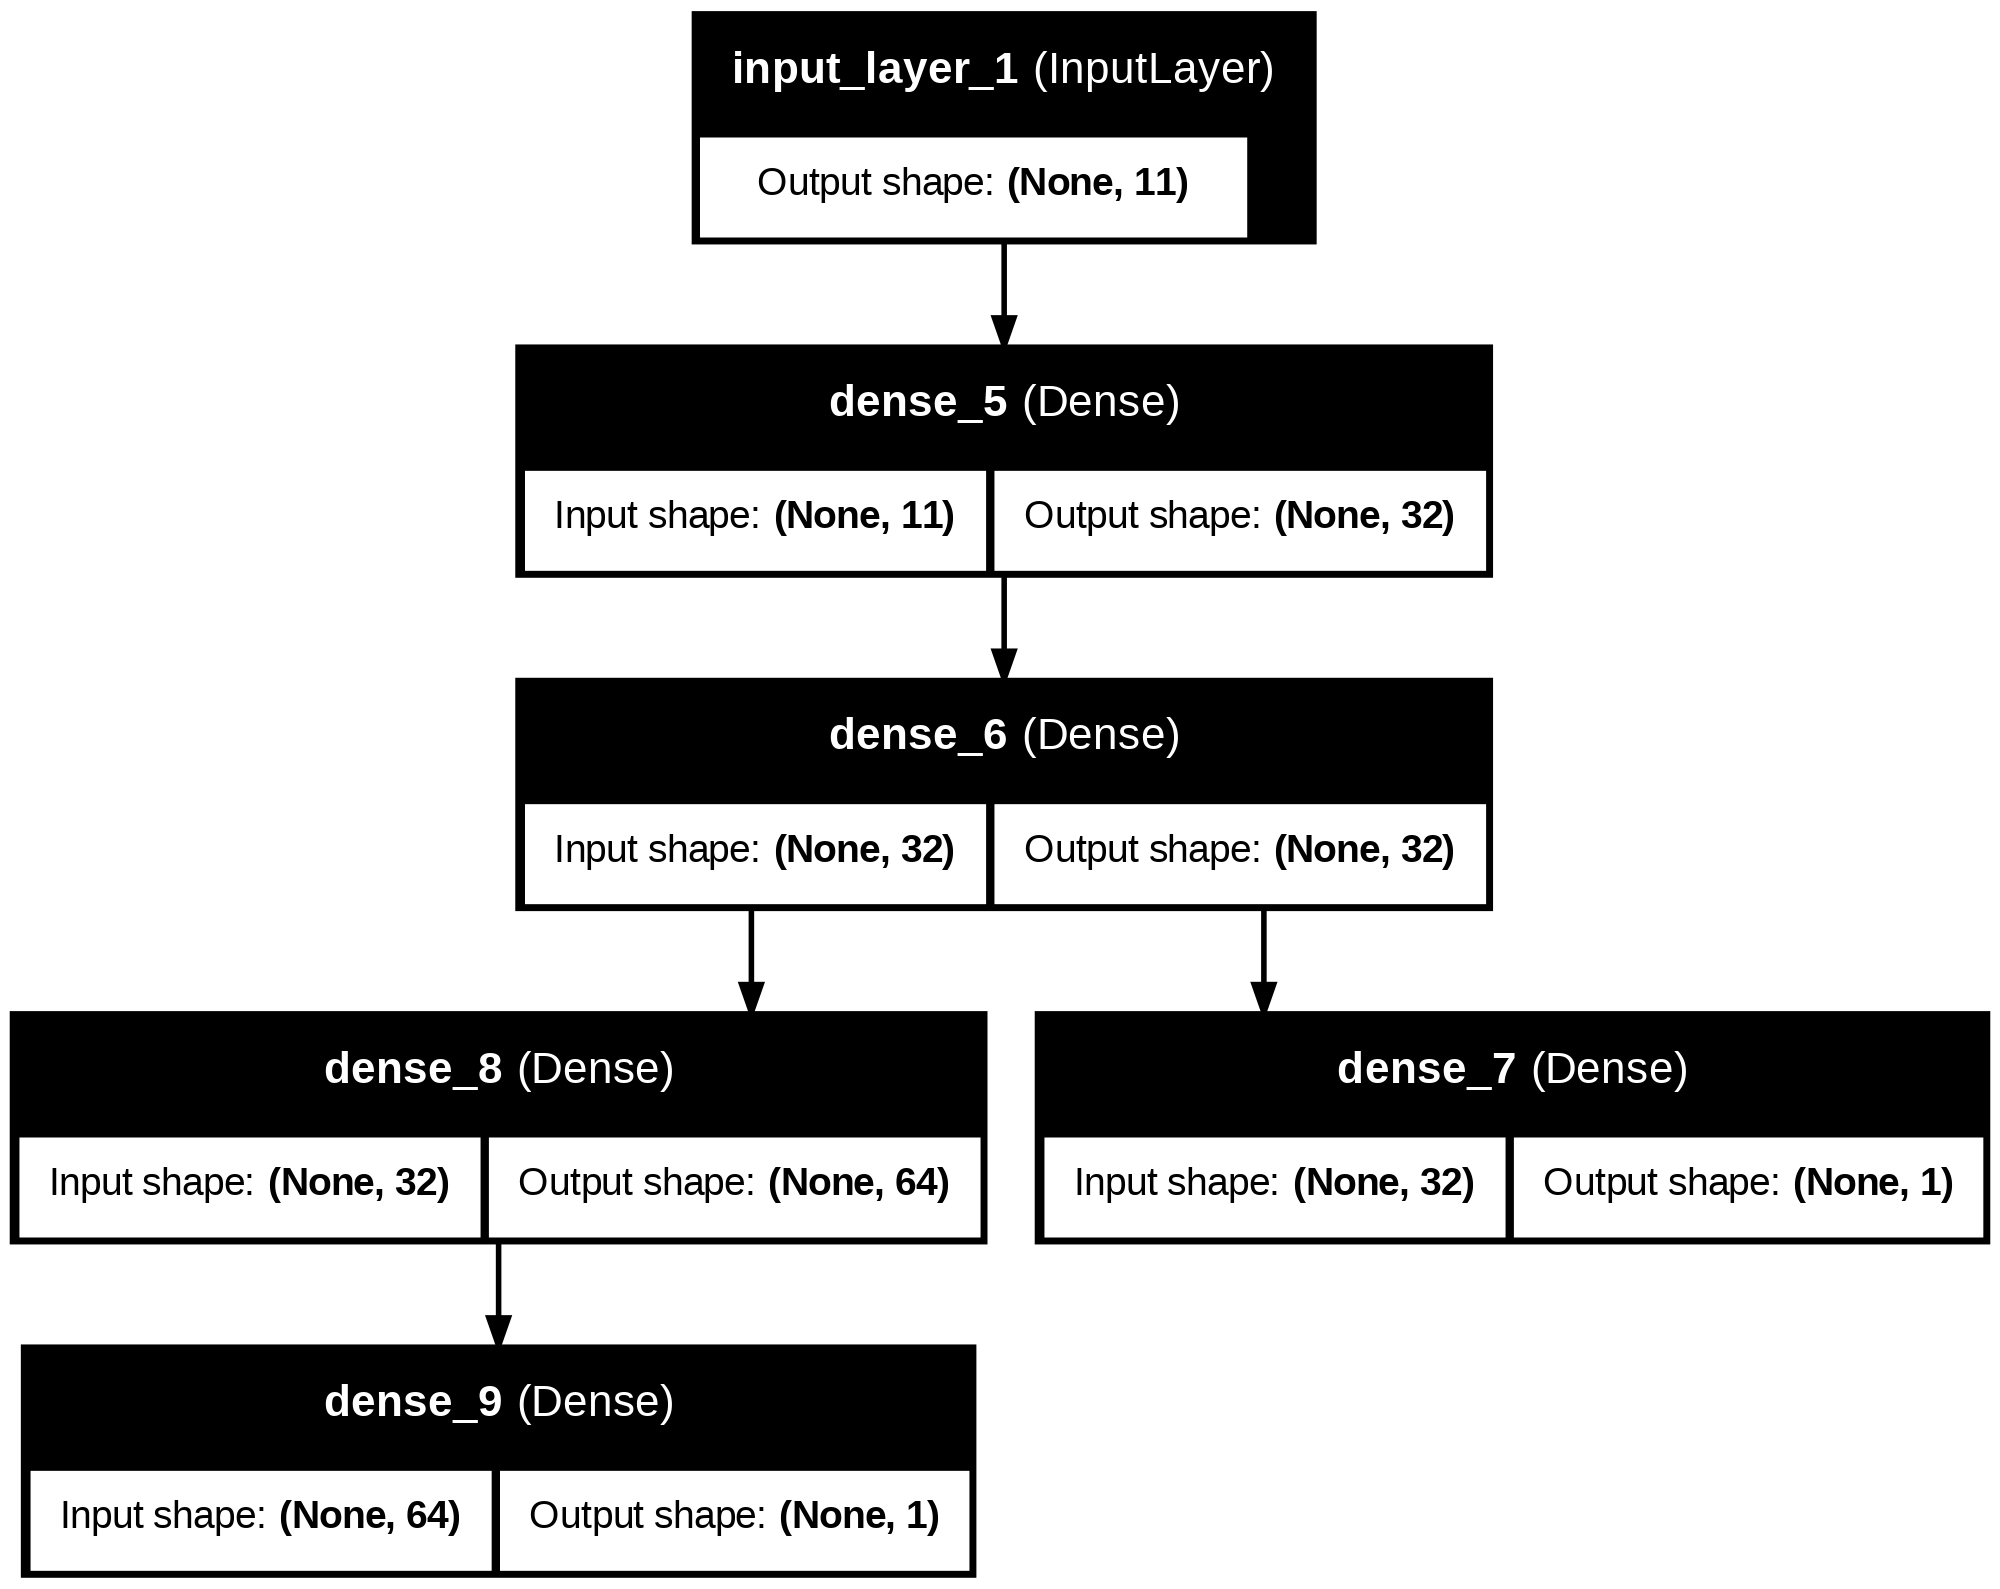

In [89]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [90]:
history = model.fit(train_X,train_y,epochs =45,validation_data=(val_X, val_y))

Epoch 1/45
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - dense_7_accuracy: 0.6774 - dense_7_loss: 0.6230 - dense_9_loss: 14.7411 - dense_9_root_mean_squared_error: 3.7347 - loss: 15.3645 - val_dense_7_accuracy: 0.8685 - val_dense_7_loss: 0.3685 - val_dense_9_loss: 1.9227 - val_dense_9_root_mean_squared_error: 1.3880 - val_loss: 2.2947
Epoch 2/45
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - dense_7_accuracy: 0.9097 - dense_7_loss: 0.2920 - dense_9_loss: 1.8093 - dense_9_root_mean_squared_error: 1.3442 - loss: 2.1013 - val_dense_7_accuracy: 0.9497 - val_dense_7_loss: 0.1950 - val_dense_9_loss: 1.2565 - val_dense_9_root_mean_squared_error: 1.1228 - val_loss: 1.4559
Epoch 3/45
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - dense_7_accuracy: 0.9652 - dense_7_loss: 0.1667 - dense_9_loss: 1.1501 - dense_9_root_mean_squared_error: 1.0712 - loss: 1.3165 - val_dense_7_accuracy: 0.9787 - val_dense_7_loss: 0.1249 - val_dense_9_loss: 0.9010 - val_dense_9_root_mean_squared_error: 0.9506 - val_loss: 1.0287
Ep

In [97]:
model.evaluate(test_X,test_y)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_7_accuracy: 0.9949 - dense_7_loss: 0.0179 - dense_9_loss: 0.5360 - dense_9_root_mean_squared_error: 0.7320 - loss: 0.5540


[0.5228709578514099,
 0.015963265672326088,
 0.5032885074615479,
 0.996133029460907,
 0.7118342518806458]

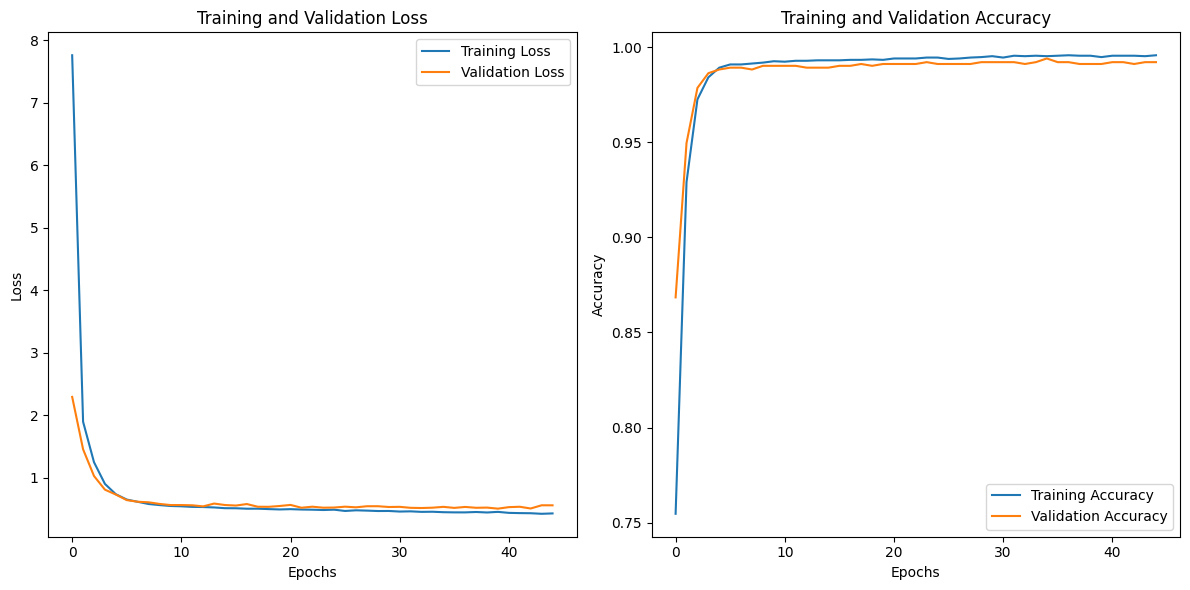

In [98]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['dense_7_accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_dense_7_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
